In [4]:
# !pip install tensorflow

import csv
import random
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', 100)
style.use("fivethirtyeight")

print(tf.__version__)

NameError: name 'style' is not defined

# EMBEDDING

In [ ]:

def clean_text(text): 
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", \
                 "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", \
                 "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", \
                 "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", \
                 "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", \
                 "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", \
                 "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", \
                 "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", \
                 "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", \
                 "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", \
                 "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", \
                 "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", \
                 "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", \
                 "your", "yours", "yourself", "yourselves" ]
    text = text.lower()
    words = text.split()
    no_words = [w for w in words if w not in stopwords]
    text = " ".join(no_words)
    
    text = re.sub(r'\|','', text)
    text = re.sub(r'-.+','', text)
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = re.sub(r'(?<!\S)\d+(?!\S)',' ', text)
    text = re.sub(r'http.+','', text)
    text = re.sub(r'\s\s',' ', text)
#     text = ' '.join(list(filter(lambda t: len(t)>1, text.split()) ))
#     text = re.sub(r'\s–ª–æ—Ç\s|–∞–Ω–∞–ª–æ–≥|\s–∞–±–æ\s|\s–¥–∫\s|\s–¥–ª—è\s|\s—Ç–∞\s|\s–ø–æ\s|\s–Ω–∞\s|\s–¥–æ\s|\s–∑–∞\s|\s–∫–æ–¥|\s–¥—Å—Ç—É|–µ–∫–≤—ñ–≤–∞–ª–µ–Ω—Ç|—ñ–Ω\s|–Ω–∞–±—ñ—Ä|–Ω–∫\s|cpv',' ', text).replace('  ',' ')
    return text



In [5]:
vocab_size = 10000
embedding_dim = 64
max_length = 15
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)


# Load model

In [6]:
with open("./embedded_220612/tokenizer_data.pkl", 'rb') as f:
    data = pickle.load(f)
    tokenizer = data['tokenizer']
    num_words = data['num_words']
    maxlen = data['maxlen']
    
new_model = tf.keras.models.load_model('./embedded_220612')
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 64)          640000    
                                                                 
 global_average_pooling1d_11  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 644,225
Trainable params: 644,225
Non-trainable params: 0
_________________________________________________________________


In [7]:
def prepare(text):
# print(d['title'])
    text = text.apply(clean_text)
    text = tokenizer.texts_to_sequences(text)
    text = pad_sequences(text, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    pred = (new_model.predict(text).reshape(-1) >= 0.9).astype(int)
    prob = (new_model.predict(text).reshape(-1))
    # print(pred,d['title'])
    # df['pred'] = pred
    # print('-----------------')
    return pred,prob
   

In [8]:
import os

files = [] 
for dirname, _, filenames in os.walk('./archive/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))

In [9]:
print(len(files))
files[:10]

278


['./archive/0819_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0820_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0821_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0822_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0823_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0824_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0825_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0826_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0827_UkraineCombinedTweetsDeduped.csv.gzip',
 './archive/0828_UkraineCombinedTweetsDeduped.csv.gzip']

In [10]:
data = []
for f in files:
    df = pd.read_csv(f, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
    df = df[(df['language']=='en')&(~df['location'].isin(['Ukraine','Kyiv, Ukraine','–£–∫—Ä–∞—ó–Ω–∞','Kyiv','–£–∫—Ä–∞–∏–Ω–∞']))][['location','text','extractedts','hashtags']]
    df['extractedts'] = df['extractedts'].replace('\s.+','', regex=True)
    pred,prob = prepare(df['text'])
    df['pred'] = pred
    # df['prob'] = prob
    # print(pred)   
    data.append({"date":df.iloc[0]['extractedts'],'total':len(df),'bad':len(df[df['pred']==1])})
    # data.append(time)
    print(f)

./archive/0819_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0820_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0821_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0822_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0823_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0824_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0825_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0826_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0827_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0828_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0829_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0830_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0831_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0901_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0902_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0903_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0904_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0905_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0906_UkraineCombinedTweetsDeduped.cs

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/1001_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1002_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1003_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1004_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1005_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1006_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1007_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1008_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1009_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1010_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1011_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1012_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1013_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1014_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1015_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1016_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1017_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1018_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1019_UkraineCombinedTweetsDeduped.cs

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,21,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/UkraineWar\UkraineWar\0422_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0423_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0424_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0425_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0426_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0427_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0428_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0429_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0430_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0501_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0502_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0503_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0504_UkraineCombinedTweetsDeduped.csv.gzip


C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


./archive/UkraineWar\UkraineWar\0505_to_0507_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0508_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0509_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0510_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0511_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0512_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0513_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0514_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0515_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0516_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0517_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0518_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0519_UkraineCombinedTweetsDeduped.csv.gzip
./archive/Ukraine

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/UkraineWar\UkraineWar\0808_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0809_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0810_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0811_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0812_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0813_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0814_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0815_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0816_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0817_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0818_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\UkraineCombinedTweetsDeduped20220227-131611.csv.gzip
./archive/UkraineWar\UkraineWar\UkraineCombinedTweetsDeduped_FEB27.csv.gzip
./archive/Ukra

In [14]:
twitter = pd.DataFrame(data)
twitter

date   total    bad
0    2022-08-19   21871    628
1    2022-08-20   18929    541
2    2022-08-21   19305    607
3    2022-08-22   21134    732
4    2022-08-23   22389    731
..          ...     ...    ...
273  2022-03-26  286461   6109
274  2022-03-27  512675  12335
275  2022-03-29  247561   5417
276  2022-03-30  235008   4997
277  2022-03-31  230632   5581

[278 rows x 3 columns]

In [19]:
twitter.sum()

date     2022-08-192022-08-202022-08-212022-08-222022-0...
total                                             35674118
bad                                                1046604
dtype: object

In [ ]:
# df = pd.concat(data, axis=0) 
# print(df.shape)
# # df['pred'].value_counts()

In [ ]:
# df

In [15]:
# df = df.rename(columns={0:'ua',1:'ru'}).reset_index()
# df['total'] = df['ua']+df['ru']
# df['per'] = df['ua']/df['total']

# df

In [16]:
# df2 = df.groupby(['extractedts'])[['ua','ru','total']].agg(['sum']).reset_index()
# df2.columns = ["_".join(pair) for pair in df2.columns]
# df2['date'] = pd.to_datetime(df2['extractedts_'])
# df2['per'] = df2['ua_sum']/df2['total_sum']

# df2

In [17]:
twitter.to_csv('twitter.csv', index=False)

<AxesSubplot:xlabel='date', ylabel='per'>

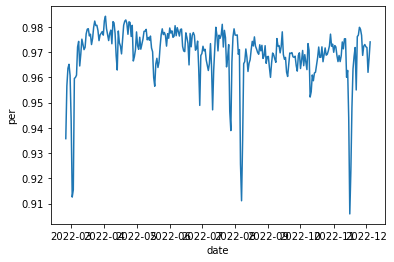

In [287]:
sns.lineplot(data=df2, x="date", y="per")

<AxesSubplot:xlabel='date', ylabel='bad'>

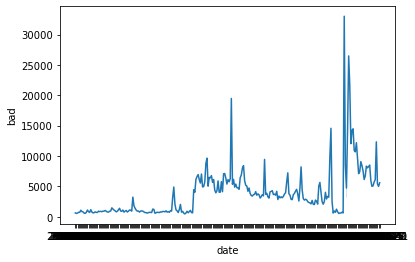

In [18]:
sns.lineplot(data=twitter, x="date", y="bad")

<AxesSubplot:xlabel='date', ylabel='ru_sum'>

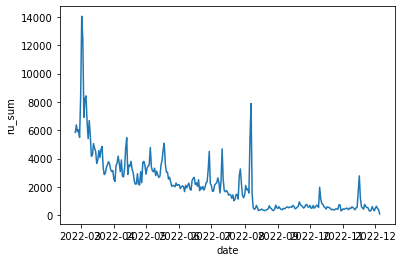

In [256]:
sns.lineplot(data=df2, x="date", y="ru_sum")

In [253]:
df2.dtypes

extractedts_            object
ua_sum                   int64
ru_sum                   int64
total_sum                int64
date            datetime64[ns]
dtype: object

In [292]:
df2[(df2['date']>'2022-11-01')]


extractedts_  ua_sum  ru_sum  total_sum       date       per
251   2022-11-02   15619     441      16060 2022-11-02  0.972540
252   2022-11-03   15902     458      16360 2022-11-03  0.972005
253   2022-11-04   15727     510      16237 2022-11-04  0.968590
254   2022-11-05   13809     483      14292 2022-11-05  0.966205
255   2022-11-06   12325     399      12724 2022-11-06  0.968642
256   2022-11-07   14645     512      15157 2022-11-07  0.966220
257   2022-11-08   14664     477      15141 2022-11-08  0.968496
258   2022-11-09   22128     591      22719 2022-11-09  0.973987
259   2022-11-10   18860     558      19418 2022-11-10  0.971264
260   2022-11-11   18462     469      18931 2022-11-11  0.975226
261   2022-11-12   15488     393      15881 2022-11-12  0.975253
262   2022-11-13   12826     534      13360 2022-11-13  0.960030
263   2022-11-14   14562     564      15126 2022-11-14  0.962713
264   2022-11-15   28990    1723      30713 2022-11-15  0.943900
265   2022-11-16   26800    2783      29583 2022-11-16  0.905926
266   2022-11-17   14681    1224      15905 2022-11-17  0.923043
267   2022-11-18   11231     616      11847 2022-11-18  0.948004
268   2022-11-19   13890     529      14419 2022-11-19  0.963312
269   2022-11-20   13182     432      13614 2022-11-20  0.968268
270   2022-11-21   26527     770      27297 2022-11-21  0.971792
271   2022-11-22   13386     631      14017 2022-11-22  0.954983
272   2022-11-23   22422     549      22971 2022-11-23  0.976100
273   2022-11-24   22762     543      23305 2022-11-24  0.976700
274   2022-11-25   17543     362      17905 2022-11-25  0.979782
275   2022-11-26   13502     290      13792 2022-11-26  0.978973
276   2022-11-27   15245     365      15610 2022-11-27  0.976618
277   2022-11-28   18924     612      19536 2022-11-28  0.968673
278   2022-11-29   15481     441      15922 2022-11-29  0.972302
279   2022-11-30   11343     315      11658 2022-11-30  0.972980
280   2022-12-01   17942     515      18457 2022-12-01  0.972097
281   2022-12-02   22069     641      22710 2022-12-02  0.971775
282   2022-12-03   12164     481      12645 2022-12-03  0.961961
283   2022-12-04   11970     401      12371 2022-12-04  0.967585
284   2022-12-05    3747     100       3847 2022-12-05  0.974006

In [293]:
df2[df2['date']=='2022-11-16']

extractedts_  ua_sum  ru_sum  total_sum       date       per
265   2022-11-16   26800    2783      29583 2022-11-16  0.905926

In [61]:
au = pd.read_csv('./archive/1116_UkraineCombinedTweetsDeduped.csv.gzip', compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
au = au[(au['language']=='en')&(~au['location'].isin(['Ukraine','Kyiv, Ukraine','–£–∫—Ä–∞—ó–Ω–∞','Kyiv','–£–∫—Ä–∞–∏–Ω–∞']))]
au.shape

(46160, 28)

In [62]:
au[:20]['hashtags'].to_list()

["[{'text': 'Kherson', 'indices': [35, 43]}]",
 "[{'text': 'Missile', 'indices': [11, 19]}, {'text': 'Poland', 'indices': [25, 32]}, {'text': 'G20', 'indices': [48, 52]}, {'text': 'G20BaliSummit', 'indices': [135, 149]}, {'text': 'Russia', 'indices': [210, 217]}]",
 "[{'text': 'Chemicalweapons', 'indices': [194, 210]}, {'text': 'OPCWinvestigate', 'indices': [213, 229]}, {'text': 'Turkey', 'indices': [232, 239]}]",
 "[{'text': 'ukraine', 'indices': [140, 148]}, {'text': 'mostshared', 'indices': [149, 160]}]",
 "[{'text': 'WWIII', 'indices': [161, 167]}, {'text': 'Ukraine', 'indices': [168, 176]}, {'text': 'Poland', 'indices': [177, 184]}, {'text': 'NATO', 'indices': [185, 190]}]",
 "[{'text': 'Putin', 'indices': [8, 14]}, {'text': 'Hitler', 'indices': [30, 37]}, {'text': 'PolandRussiaWar', 'indices': [64, 80]}, {'text': 'PutinWarCriminal', 'indices': [81, 98]}, {'text': 'UkraineRussianWar', 'indices': [99, 117]}, {'text': 'PutinHitler', 'indices': [118, 130]}]",
 "[{'text': 'Ukraine', '

In [64]:
pred,prob = prepare(au['text'])
au['pred'] = pred

In [65]:
au[au['pred']==1][:20]['hashtags'].to_list()

["[{'text': 'UkraineRussiaWar', 'indices': [152, 169]}]",
 "[{'text': 'NATO', 'indices': [101, 106]}, {'text': 'Poland', 'indices': [107, 114]}, {'text': 'UnitedStates', 'indices': [115, 128]}, {'text': 'WWIII', 'indices': [129, 135]}, {'text': 'Ukraine', 'indices': [136, 144]}]",
 "[{'text': 'WWIII', 'indices': [35, 41]}, {'text': 'NATO', 'indices': [42, 47]}, {'text': 'Russia', 'indices': [48, 55]}, {'text': 'Poland', 'indices': [56, 63]}]",
 "[{'text': 'Russia', 'indices': [83, 90]}]",
 "[{'text': 'WWIII', 'indices': [0, 6]}, {'text': 'UkraineÔ∏è', 'indices': [39, 48]}, {'text': 'Poland', 'indices': [61, 68]}, {'text': 'USA', 'indices': [105, 109]}, {'text': 'Russia', 'indices': [140, 147]}]",
 "[{'text': 'worldwar3', 'indices': [48, 58]}, {'text': 'Russia', 'indices': [128, 135]}, {'text': 'Ukraine', 'indices': [136, 144]}]",
 "[{'text': 'StopFundingRussia', 'indices': [210, 228]}, {'text': 'StandWithUkraine', 'indices': [230, 247]}, {'text': 'RussiansOffTheIce', 'indices': [256, 2

In [66]:
au[au['pred']==1][:20]['text'].to_list()

["I just think Ukraine is trying it's best to bring NATO to attack Russia. Even Poland isn't sure if Russia fired those 2 missiles that landed in Poland.\n#UkraineRussiaWar",
 'How the Armed Forces of Ukraine defeated the best Russian units. Frames that will go down in history\n#NATO #Poland #UnitedStates #WWIII #Ukraine #\nhttps://t.co/DeW3RwzviI',
 'Genz on there way to defend Poland #WWIII #NATO #Russia #Poland https://t.co/e0TgAiQmjj',
 "Why do Ashkenazi Zionist Jews show such hatred towards Europeans and in particular #Russia? They are not Hebrews, they are not Semites and their claim of 'antisemitism' is utter nonsense. Palestinians are Semites not Jews and the DNA evidence proves it.\n\nhttps://t.co/cz0WArCFdc",
 '#WWIII is not gonna start because some #UkraineÔ∏è missile hit #Poland. It‚Äôs continuing to start since we (#USA) have caused a proxy war with #Russia thru Ukraine. üôÑ',
 'As if we don‚Äôt have enough worries in life that #worldwar3 is trending. Like seriously wtf i

# STATS

In [54]:
bad_tags = []
for f in files:
    df = pd.read_csv(f, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
    df['extractedts'] = df['extractedts'].replace('\s.+','', regex=True)
   
    en = df[(df['language']=='en')]
    
    withoutua = df[(df['language']=='en')&\
             (~df['location'].isin(['Ukraine','Kyiv, Ukraine','–£–∫—Ä–∞—ó–Ω–∞','Kyiv','–£–∫—Ä–∞–∏–Ω–∞']))]
    
    tags = df[
             (df['hashtags'].str.contains('IStandWithPutin|Istandwithrussia', regex=True))]
    
    
    tagsen = df[(df['language']=='en')&\
             (~df['location'].isin(['Ukraine','Kyiv, Ukraine','–£–∫—Ä–∞—ó–Ω–∞','Kyiv','–£–∫—Ä–∞–∏–Ω–∞']))&\
             (df['hashtags'].str.contains('IStandWithPutin|Istandwithrussia', regex=True))]
    
    bad_tags.append({'date':df.iloc[0]['extractedts'],\
                     'total':len(df),'en':len(en),'withoutua':len(withoutua)\
                     ,'tags':len(tags),'tagsen':len(tagsen)})
    print(f)

./archive/0819_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0820_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0821_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0822_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0823_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0824_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0825_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0826_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0827_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0828_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0829_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0830_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0831_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0901_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0902_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0903_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0904_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0905_UkraineCombinedTweetsDeduped.csv.gzip
./archive/0906_UkraineCombinedTweetsDeduped.cs

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/1001_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1002_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1003_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1004_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1005_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1006_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1007_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1008_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1009_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1010_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1011_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1012_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1013_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1014_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1015_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1016_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1017_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1018_UkraineCombinedTweetsDeduped.csv.gzip
./archive/1019_UkraineCombinedTweetsDeduped.cs

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,21,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/UkraineWar\UkraineWar\0422_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0423_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0424_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0425_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0426_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0427_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0428_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0429_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0430_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0501_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0502_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0503_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0504_UkraineCombinedTweetsDeduped.csv.gzip


C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


./archive/UkraineWar\UkraineWar\0505_to_0507_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0508_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0509_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0510_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0511_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0512_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0513_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0514_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0515_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0516_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0517_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0518_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0519_UkraineCombinedTweetsDeduped.csv.gzip
./archive/Ukraine

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


./archive/UkraineWar\UkraineWar\0808_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0809_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0810_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0811_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0812_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0813_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0814_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0815_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0816_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0817_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\0818_UkraineCombinedTweetsDeduped.csv.gzip
./archive/UkraineWar\UkraineWar\UkraineCombinedTweetsDeduped20220227-131611.csv.gzip
./archive/UkraineWar\UkraineWar\UkraineCombinedTweetsDeduped_FEB27.csv.gzip
./archive/Ukra

In [53]:
# df['location'].value_counts()[:50]

In [55]:
pd.DataFrame(bad_tags)

date   total      en  withoutua  tags  tagsen
0    2022-08-19   47994   23179      21871     5       1
1    2022-08-20   44364   20103      18929     0       0
2    2022-08-21   47708   20242      19305     1       1
3    2022-08-22   46979   22168      21134     0       0
4    2022-08-23   50253   23760      22389     1       1
..          ...     ...     ...        ...   ...     ...
273  2022-03-26  411296  290989     286461   193     127
274  2022-03-27  768164  520599     512675   414     301
275  2022-03-29  364124  251751     247561   103      70
276  2022-03-30  348864  239541     235008    52      36
277  2022-03-31  344515  234857     230632    51      36

[278 rows x 6 columns]

In [56]:
pd.DataFrame(bad_tags).to_csv('stats2.csv', index=False)

In [58]:
tags = pd.DataFrame(bad_tags)
tags['date'] = pd.to_datetime(tags['date'])
tags.dtypes

date         datetime64[ns]
total                 int64
en                    int64
withoutua             int64
tags                  int64
tagsen                int64
dtype: object

In [60]:
tags[tags['date']>'2022-11-01']

date   total     en  withoutua  tags  tagsen
75  2022-11-02   46265  24762      23848     2       1
76  2022-11-03   45887  24627      23713     5       5
77  2022-11-04   48313  26561      25495    12       5
78  2022-11-05   45068  24170      23401     2       1
79  2022-11-06   41485  22094      21352     1       1
80  2022-11-07   61353  25016      24198     2       0
81  2022-11-08   43756  23287      22451     1       1
82  2022-11-09   63623  35542      34673     1       1
83  2022-11-10   50945  27900      26993     0       0
84  2022-11-11   60872  32315      30876     0       0
85  2022-11-12   47580  26007      25145     2       2
86  2022-11-13   42680  22452      21629     1       0
87  2022-11-14   48955  23955      22953     3       0
88  2022-11-15  100524  47599      45640     2       1
89  2022-11-16   91774  47254      46160     0       0
90  2022-11-17   51129  25738      24564     3       3
91  2022-11-18   38643  19105      18225     4       4
92  2022-11-19   47399  23841      22851     3       0
93  2022-11-20   42512  21773      20953     2       2
94  2022-11-21   89515  47030      46086     0       0
95  2022-11-22   49338  24462      23577     0       0
96  2022-11-23   92020  41345      39928     5       5
97  2022-11-24   74093  36361      35389     0       0
98  2022-11-25   47426  25956      25085     2       1
99  2022-11-26   38845  19596      18627     3       2
100 2022-11-27   53455  28097      27284     5       2
101 2022-11-28   64719  29299      28434     3       2
102 2022-11-30   45941  24947      24085     2       2
103 2022-11-30   37751  18629      17876     0       0
104 2022-12-01   61061  29434      28595     0       0
105 2022-12-02   70929  36998      36350     1       1
106 2022-12-03   39730  20822      20197     1       1
107 2022-12-04   40850  22343      21522     0       0

<AxesSubplot:xlabel='date', ylabel='tagsen'>

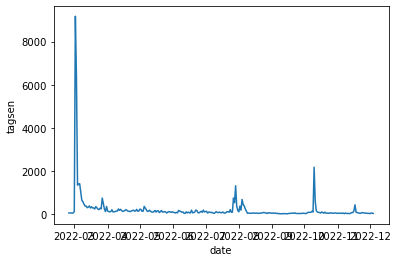

In [20]:
sns.lineplot(data=tags, x="date", y="tagsen")


In [41]:
tags[:3]

date  total     en  withoutua  tags  tagsen
0 2022-08-19  47994  23179      21871    95      41
1 2022-08-20  44364  20103      18929   107      34
2 2022-08-21  47708  20242      19305   153      54

In [45]:
tags.groupby(pd.Grouper(key='date',freq='W'))[['total','en','withoutua','tags','tagsen']].agg(['sum'])

total       en withoutua   tags tagsen
                sum      sum       sum    sum    sum
date                                                
2022-02-27  1586367   950769    945519    180    109
2022-03-06  3194090  2130498   2090253  22443  19873
2022-03-13  3301423  2235289   2204537   5275   3758
2022-03-20  3156400  2167820   2138174   3608   2152
2022-03-27  3287496  2283777   2247347   4085   2357
2022-04-03  2238821  1545286   1513784   1753   1082
2022-04-10  2866090  1931595   1895458   2399    941
2022-04-17  2543176  1768030   1732628   3698   1243
2022-04-24  2565553  1786606   1756173   3195   1086
2022-05-01  2303541  1590671   1563358   2947   1213
2022-05-08  2438813  1648521   1621478   2405    969
2022-05-15  2390959  1524565   1500728   2167    934
2022-05-22  1956534  1298822   1279869   2109    863
2022-05-29  1629640  1113775   1094220   1508    695
2022-06-05  1617580  1094620   1077210   1355    551
2022-06-12  1666442  1172474   1155695    991    444
2022-06-19  1587572  1020920   1003897   1719    631
2022-06-26  1378040   935216    918989   1724    749
2022-07-03  1575155   917223    897157   1753    812
2022-07-10  1198317   803707    791680   1339    507
2022-07-17  1370724   873084    850277   1940    596
2022-07-24  1023005   652738    639967   1446    704
2022-07-31  1131200   690828    668093   6829   3327
2022-08-07  1582490   901666    881987   5832   2417
2022-08-14   341575   186607    178909    970    409
2022-08-21   327637   155409    146722    764    320
2022-08-28   364925   174388    165633    982    410
2022-09-04   353091   174611    167548    930    344
2022-09-11   403520   193137    185490    558    175
2022-09-18   424575   211065    203194    672    180
2022-09-25   483793   227621    219823    925    288
2022-10-02   463824   205516    198167    617    235
2022-10-09   441571   212361    204175   1776    603
2022-10-16   510702   241733    231608   6196   3260
2022-10-23   378225   176001    168212   1109    450
2022-10-30   380680   200390    194041    809    354
2022-11-06   316268   168297    161772    742    300
2022-11-13   370809   192519    185965    553    246
2022-11-20   420936   209265    201346   1951    953
2022-11-27   444692   222847    215976    811    372
2022-12-04   360981   182472    177059    606    274

In [71]:
tags.sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_14168/2995404402.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tags.sum()


total        56377232
en           36372739
withoutua    35674118
tags            32416
tagsen          26541
dtype: int64

In [74]:
.32/56*100

0.5714285714285714